<a href="https://colab.research.google.com/github/marianagg0412/grafica/blob/main/ejercicio1_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Filtro promedio
# Imagen de trabajo: meb.png
# El filtro promedio es calculado por convolución de la imagen con una imagen uniforme.
# Corresponde al “suavizado” de la imagen.
# Ejercicio:

# 3- Visualice la imagen y su histograma.
# 4- Describa su forma (continuo?, discontinuo?, niveles de gris?, ...)
# 6-. Aplique el filtro promedio utilizando una máscara de tamaño 3x3 a esta imagen. Cualitativamente, cómo es la imagen resultado?
# 7- Visualice el histograma de esta nueva imagen, y compárelo con el histograma de la imagen original (forma general, altura de los picos, ...) .
# 8- Calcule la imagen de diferencia con la original. Justifique el resultado obtenido (en cuáles regiones de la imagen son visibles las diferencias?, por qué?...)
# 9- Ahora filtre la imagen original con un filtro promedio utilizando una máscara de tamaño 5x5. Paralelamente, filtre la imagen original, aplicando consecutivamente sobre esta, dos filtros promedio de tamaño 3x3. Haga una evaluación visual de los resultados:
# ·Las dos imágenes obtenidas son idénticas?
# ·Por qué?
# ·Cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?

In [19]:
from skimage import data, color, exposure
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage.util as util
from skimage.filters import gaussian, median
from scipy.ndimage import convolve

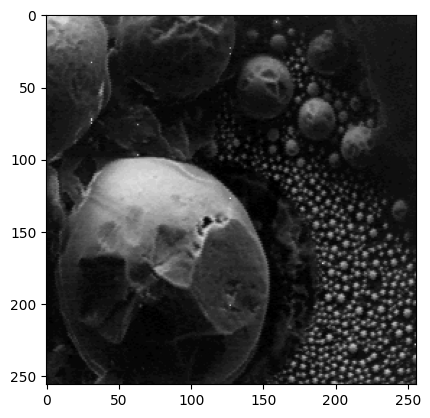

In [22]:
image = mpimg.imread('MEB.png')
image = image[:,:,:3]
plt.imshow(image)


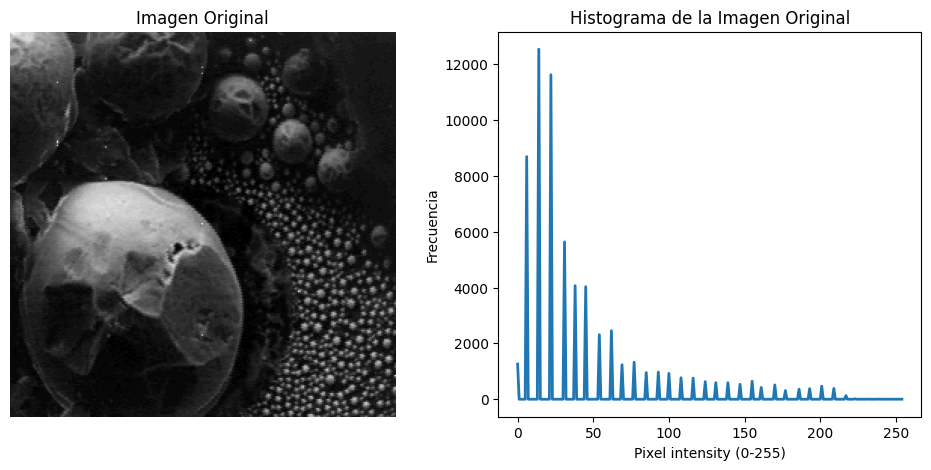

In [28]:
gray_image_255 = (image * 255).astype(np.uint8)
hist, hist_centers = exposure.histogram(gray_image_255, nbins=256)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, lw=2)
plt.title('Histograma de la Imagen Original')
plt.xlabel('Pixel intensity (0-255)')
plt.ylabel('Frecuencia')
plt.show()

Distribución asimétrica, valores discretos, predominan niveles de gris oscuros

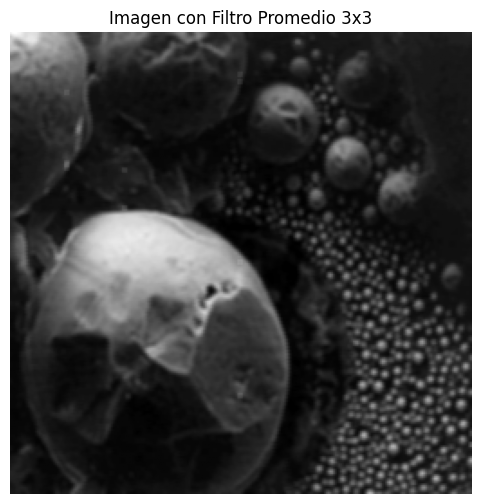

In [24]:
if image.ndim == 3:
    image = color.rgb2gray(image)

kernel_3x3 = np.ones((3, 3)) / 9
smoothed_3x3 = convolve(image, kernel_3x3)

plt.figure(figsize=(6, 6))
plt.imshow(smoothed_3x3, cmap='gray')
plt.title("Imagen con Filtro Promedio 3x3")
plt.axis("off")
plt.show()

Cualitativamente: imagen borrosa, bordes difuminados

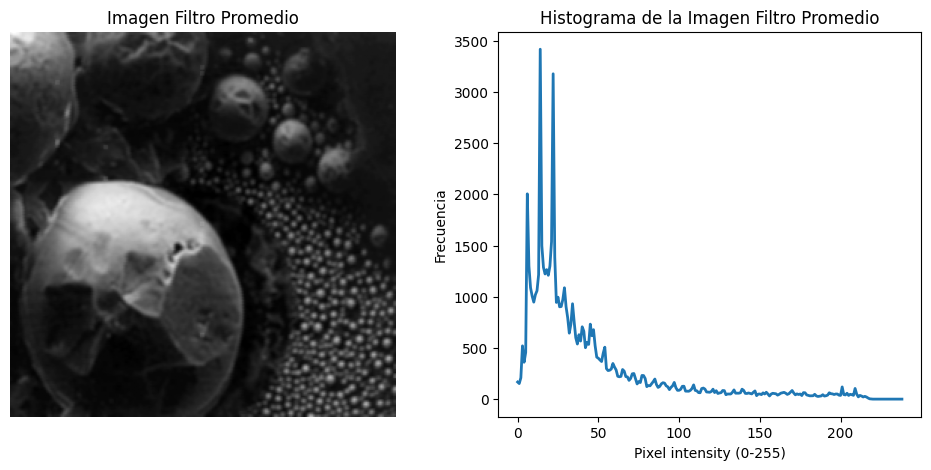

In [27]:
smoothed_3x3_255 = (smoothed_3x3 * 255).astype(np.uint8)
hist, hist_centers = exposure.histogram(smoothed_3x3_255, nbins=256)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(smoothed_3x3, cmap='gray')
plt.title("Imagen Filtro Promedio")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, lw=2)
plt.title('Histograma de la Imagen Filtro Promedio')
plt.xlabel('Pixel intensity (0-255)')
plt.ylabel('Frecuencia')
plt.show()

Parece como si tuviera ruido exponencial

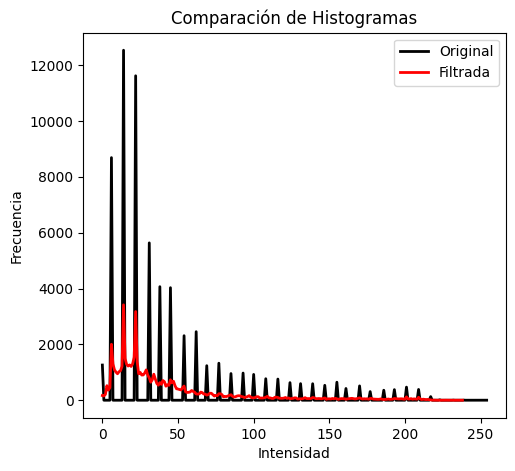

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
hist_filtered, hist_centers_filtered = exposure.histogram(smoothed_3x3_255, nbins=256)
plt.plot(hist_centers, hist, lw=2, label='Original', color='black')
plt.plot(hist_centers_filtered, hist_filtered, lw=2, label='Filtrada', color='red')
plt.title("Comparación de Histogramas")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Altura de picos reducida, ahora los pixeles son más similares por la suavización

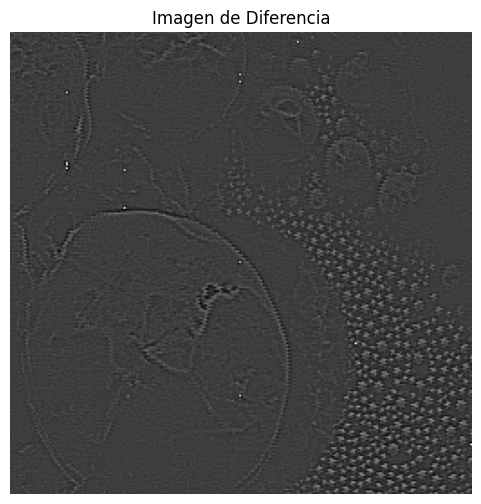

In [30]:
difference = image - smoothed_3x3
plt.figure(figsize=(6, 6))
plt.imshow(difference, cmap='gray')
plt.title("Imagen de Diferencia")
plt.axis("off")
plt.show()

Se pierde intensidad de las secciones blancas por la suavización y el filtro promedio

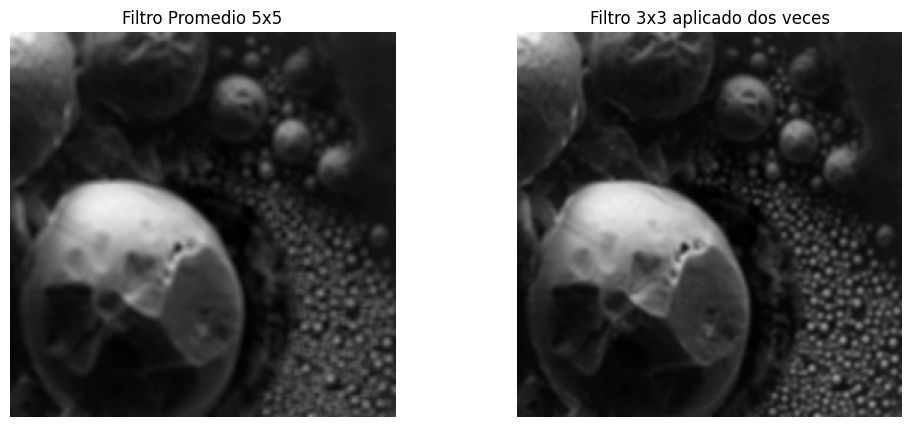

In [31]:
kernel_5x5 = np.ones((5, 5)) / 25
smoothed_5x5 = convolve(image, kernel_5x5)
smoothed_3x3_twice = convolve(convolve(image, kernel_3x3), kernel_3x3)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(smoothed_5x5, cmap='gray')
plt.title("Filtro Promedio 5x5")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(smoothed_3x3_twice, cmap='gray')
plt.title("Filtro 3x3 aplicado dos veces")
plt.axis("off")
plt.show()

No son idénticas, la de la máscara 5x5 es más borrosa

**5x5 Kernel**: This kernel averages pixel values over a larger area (5x5 neighborhood), resulting in a more aggressive smoothing effect. It tends to blur the image more significantly, reducing both fine details and larger variations in gray levels.

**Applying 3x3 Kernel Twice**: Applying the 3x3 kernel twice is a less aggressive approach. Each application smooths the image slightly, and the second application further smooths the already smoothed result. This leads to a gradual reduction in gray level variations, preserving some finer details compared to the 5x5 kernel.

For **stronger smoothing and suppressing major gray level variation**s, the 5x5 kernel is more effective. It blurs the image more significantly, reducing the prominence of edges and textures.
For **preserving finer details while still achieving a degree of smoothing**, applying the 3x3 kernel twice is preferable. It offers a more gradual smoothing effect, resulting in a less blurry image.